In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# test if the queue_indices method is identical to qscan.

In [3]:
os.getcwd()
df = pd.read_csv("./day1/out_fcfs.csv",sep=";")
label = df['Lambda'][0]
print(label)


Policy : FCFS, Duration: Expon(1.0), Requirement: Uniform(0.01, 1.0), Jobs per data point: 10000000, Seed: 2


In [4]:
def get_data(df):
        
    lam = df['Lambda'][1:]
    mrt = df[' Mean Response Time'][1:]
    assert len(lam) == len(mrt)
    adj_lam,adj_mrt = [],[]
    
    # go through and stop once and error hits
    
    for i in range(1,len(mrt)+1): # wow the dataframe starts at 1, so cool
        if "Error" in lam[i]:
            break
        else:
            adj_lam.append(lam[i])
            adj_mrt.append(mrt[i])
    return adj_lam,adj_mrt


In [5]:
#['Lambda'][0]
dirname = "./day2"
directory = os.fsencode(dirname)

lambdas = []
mrts = []
labels = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename)
    ext = os.getcwd()
    full = ext + '/' + dirname +  '/' + filename
    if filename.endswith(".csv"):
        df = pd.read_csv(full,sep=";")
        labels.append(df['Lambda'][0])
        L,M = get_data(df)
        lambdas.append(L)
        mrts.append(M)
    else:
        continue

out_fcfs.csv
out_srpt.csv
out_plcfs.csv
out_srptb.csv
out_fcfsb.csv


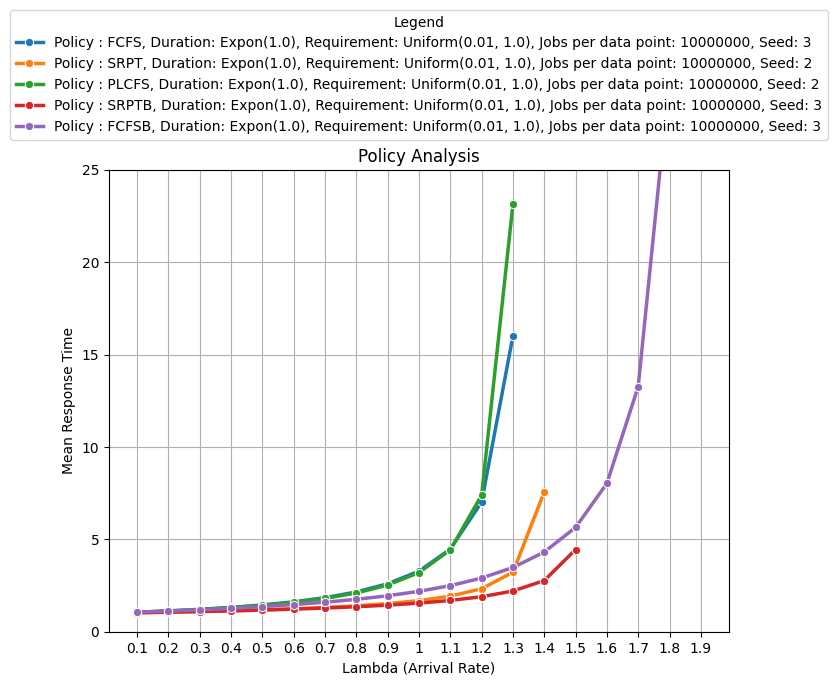

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data structure (replace with your data)

# Create figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Loop through corresponding x-y pairs and plot
for i in range(len(lambdas)):
    sns.lineplot(
        x=lambdas[i],
        y=mrts[i],
        label=labels[i], 
        ax=ax,               
        linewidth=2.5,
        marker='o'          
    )

# Add plot decorations
ax.set(
    title='Policy Analysis',
    xlabel='Lambda (Arrival Rate)',
    ylabel='Mean Response Time'
)

# custom legend (did not know you could do this)
plt.legend(
    title='Legend',
    loc='lower center',        
    bbox_to_anchor=(0.5, 1.05), 
    ncol=1,                      
    frameon=True                
)
plt.ylim([0,25])
plt.grid(True)
plt.show()